# Proyek Analisis Data: Bike Sharing 
- **Nama:** Ratih Anggraeni
- **Email:** m182b4kx3698@bangkit.academy
- **ID Dicoding:** ratihanggraeni

## Menentukan Pertanyaan Bisnis

- Berapa persentase peningkatan jumlah peminjaman sepeda pada akhir pekan dibandingkan hari kerja dalam satu bulan terakhir?
- Bagaimana tren jumlah peminjaman sepeda pada hari libur (holiday) dibandingkan dengan hari biasa dalam enam bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [534]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [535]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [536]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- File day.csv mencatat penyewaan sepeda per hari dengan informasi serupa, namun dalam skala yang lebih umum.
- File hour.csv mencatat penyewaan sepeda per jam, termasuk data seperti tanggal, musim, hari, cuaca, suhu, kelembaban, kecepatan angin, dan jumlah pengguna (terdaftar dan tidak terdaftar).

## Assessing Data

### Menilai tabel day_df

In [537]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [538]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [539]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [540]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai tabel hour_df

In [541]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [542]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [543]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [544]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
Data sudah berkualitas baik tanpa masalah, namun akan ada beberapa perbaikan. Kolom instant dan workingday akan dihapus karena tidak relevan, beberapa kolom seperti season dan weekday akan diubah menjadi tipe kategorikal, dan dteday akan diubah ke tipe datetime. Nama-nama kolom akan disederhanakan, dan kolom baru category_days akan ditambahkan untuk membedakan antara weekend dan weekday.

### Cleaning Data

### Dropping


In [545]:
# Hapus kolom instant dan season pada hour_df
hour_df.drop(columns=["instant", "season"], inplace=True)

# Hapus kolom instant dan workingday pada day_df
day_df.drop(["instant"], axis = 1, inplace= True)
day_df.drop(["season"], axis = 1, inplace= True)


### Konversi Tipe Data

In [546]:
# Ubah tipe data numerik ke categori
columns = ["mnth", "holiday", "weekday","workingday", "temp"]

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    
    hour_df[column] =  hour_df[column].astype("category")

In [547]:
# ubah tipe data object ke datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

### Rename

In [548]:
# ubah nama kolom di day_df
day_df.rename(columns={
    "yr": "year",
    "mnth": "month",
    "weekday": "weekend",
    "weathersit": "weather_situation",
    "windspeed": "wind_speed",
    "cnt": "count",
    "hum": "humidity"
}, inplace=True)

In [549]:
#  ubah nama kolom di hour_df
hour_df.rename(columns={
    "yr": "year",
    "hr": "hours",
    "mnth": "month",
    "weekday": "weekend",
    "weathersit": "weather_situation",
    "windspeed": "wind_speed",
    "cnt": "count",
    "hum": "humidity"
}, inplace=True)

In [550]:
# Fungsi untuk mengganti nilai dalam kolom DataFrame
def replace_values(df, column, replacements):
    """Mengganti nilai dalam kolom DataFrame jika kolom ada."""
    if column in df.columns:
        df[column] = df[column].replace(replacements)

# Konversi season
season_mapping = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
replace_values(day_df, 'season', season_mapping)
replace_values(hour_df, 'season', season_mapping)

# Konversi month
month_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May",
    6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct",
    11: "Nov", 12: "Dec"
}
replace_values(day_df, 'mnth', month_mapping)  # Kolom bulan adalah 'mnth'
replace_values(hour_df, 'mnth', month_mapping)

# Konversi weather_situation
weather_mapping = {1: "clear", 2: "cloudy", 3: "light rain", 4: "heavy rain"}
replace_values(day_df, 'weather_situation', weather_mapping)
replace_values(hour_df, 'weather_situation', weather_mapping)

# Konversi weekday (bukan weekend)
week_mapping = {
    0: "Sunday", 1: "Monday", 2: "Tuesday", 
    3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"
}
replace_values(day_df, 'weekday', week_mapping)  # Menggunakan 'weekday'
replace_values(hour_df, 'weekday', week_mapping)

# Konversi year
year_mapping = {0: "2011", 1: "2012"}
replace_values(day_df, 'yr', year_mapping)  # Kolom tahun adalah 'yr'
replace_values(hour_df, 'yr', year_mapping)

# Menghitung Humidity (pastikan kolom ada dalam dataset)
if 'humidity' in day_df.columns:
    day_df['humidity'] = day_df['humidity'] * 100

if 'humidity' in hour_df.columns:
    hour_df['humidity'] = hour_df['humidity'] * 100


### Membuat kolom baru bernama total_users

In [551]:
# Membuat kolom baru bernama total_users yang menjumlahkan casual dan registered
hour_df["total_users"] = hour_df["casual"] + hour_df["registered"]

# Jika kamu ingin membuat total_users di day_df juga
day_df["total_users"] = day_df["casual"] + day_df["registered"]


**Insight:**
Perbaikan telah diselesaikan, sehingga kolom instant dan season telah dihapus. Selanjutnya, kolom mnth, holiday, weekday, workingday, dan temp telah diubah dari tipe int menjadi category, sementara kolom dteday diubah dari object menjadi datetime. Selain itu, kolom baru bernama total_users telah ditambahkan untuk menghitung total jumlah pengguna sepeda dengan menggabungkan pengguna casual dan registered.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [552]:
day_df.describe(include="all")

,dteday,year,month,holiday,weekend,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count,total_users
count,731,731.000000,731.0,731.0,731.0,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,12.0,2.0,7.0,2.0,3,499.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,1.0,0.0,0.0,1.0,clear,0.265833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,62.0,710.0,105.0,500.0,463,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,0.500684,NaN,NaN,NaN,NaN,NaN,NaN,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,4504.348837
min,2011-01-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,22.000000
25%,2011-07-02 12:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,3152.000000
50%,2012-01-01 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,4548.000000
75%,2012-07-01 12:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,5956.000000
max,2012-12-31 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,8714.000000


In [553]:
# Melihat jumlah penyewaan tiap tanggal (dteday)
top_dteday = (
    day_df.groupby(by="dteday", observed=True)["count"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(10)
)

# Mengubah format angka dengan titik sebagai pemisah ribuan
top_dteday['count'] = top_dteday['count'].apply(lambda x: f"{int(x):,}".replace(",", "."))

# Menampilkan hasil
print(top_dteday)


      dteday  count
0 2012-09-15  8.714
1 2012-09-29  8.555
2 2012-09-22  8.395
3 2012-03-23  8.362
4 2012-05-19  8.294
5 2012-09-09  8.227
6 2012-07-25  8.173
7 2012-09-21  8.167
8 2012-10-05  8.156
9 2012-06-02  8.120


### Explore hour_df

In [554]:
hour_df.describe(include="all")

,dteday,year,month,hours,holiday,weekend,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count,total_users
count,17379,17379.000000,17379.0,17379.000000,17379.0,17379.0,17379.0,17379,17379.00,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,12.0,NaN,2.0,7.0,2.0,4,50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,7.0,NaN,0.0,6.0,1.0,clear,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1488.0,NaN,16879.0,2512.0,11865.0,11413,726.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,0.502561,NaN,11.546752,NaN,NaN,NaN,NaN,NaN,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,189.463088
min,2011-01-01 00:00:00,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2011-07-04 00:00:00,0.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,40.000000
50%,2012-01-02 00:00:00,1.000000,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,142.000000
75%,2012-07-02 00:00:00,1.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,281.000000
max,2012-12-31 00:00:00,1.000000,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,977.000000


In [555]:
# Agregasi sewa berdasarkan jam
hourly_counts = hour_df.groupby(by="month").agg({"count": "sum"})

# Mengubah format angka dengan titik sebagai pemisah ribuan
hourly_counts['count'] = hourly_counts['count'].apply(lambda x: f"{int(x):,}".replace(",", "."))

# Menampilkan hasil
print(hourly_counts)

         count
month         
1      134.933
2      151.352
3      228.920
4      269.094
5      331.686
6      346.342
7      344.948
8      351.194
9      345.991
10     322.352
11     254.831
12     211.036


C:\Users\ratih\AppData\Local\Temp\ipykernel_8920\2175060157.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_counts = hour_df.groupby(by="month").agg({"count": "sum"})


**Insight:**
Dari hasil analisis penyewaan sepeda berdasarkan tanggal, terlihat bahwa tanggal 15 September 2012 mencatatkan jumlah penyewaan tertinggi dengan 8.714, diikuti oleh tanggal 29 dan 22 September, yang menunjukkan adanya lonjakan penggunaan sepeda pada bulan September. Hal ini mungkin dipengaruhi oleh cuaca yang baik atau kegiatan spesifik yang mendorong penggunaan sepeda. Selain itu, analisis penyewaan berdasarkan bulan menunjukkan tren yang menarik, di mana bulan Mei mencatatkan total penyewaan tertinggi dengan 331.686, diikuti oleh bulan Juni dan Juli. Puncak penyewaan di musim panas (Mei hingga September) mengindikasikan bahwa faktor cuaca dan musim berpengaruh signifikan terhadap perilaku penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
#### Berapa persentase peningkatan jumlah peminjaman sepeda pada akhir pekan dibandingkan hari kerja dalam satu bulan terakhir?


Index(['dteday', 'year', 'month', 'hours', 'holiday', 'weekend', 'workingday',
       'weather_situation', 'temp', 'atemp', 'humidity', 'wind_speed',
       'casual', 'registered', 'count', 'total_users'],
      dtype='object')
Persentase peningkatan peminjaman sepeda pada akhir pekan: -60.28%


C:\Users\ratih\AppData\Local\Temp\ipykernel_8920\1214035774.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bulan_terakhir['weekend'] = data_bulan_terakhir['workingday'].isin([6, 0])


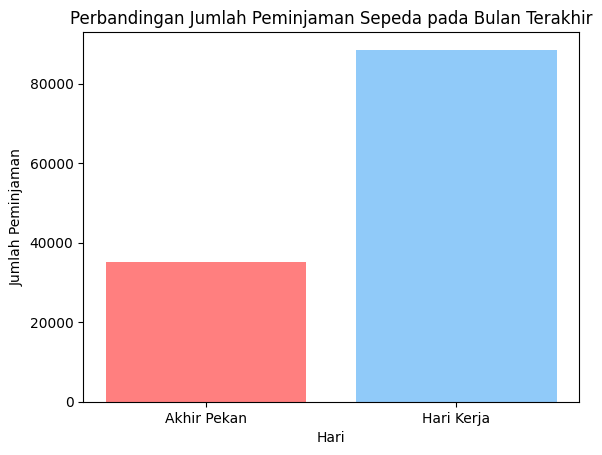

In [556]:
# Mengubah kolom tanggal menjadi tipe datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Asumsi: kolom 'mnth' (bukan 'month') adalah kategorikal, ubah menjadi numerik
hour_df['month'] = pd.to_numeric(hour_df['month'])

# Menentukan bulan terakhir
bulan_terakhir = hour_df['month'].max()
tahun_terakhir = hour_df['year'].max()

# Memfilter data berdasarkan bulan terakhir
data_bulan_terakhir = hour_df[(hour_df['year'] == tahun_terakhir) & (hour_df['month'] == bulan_terakhir)]

# Mengecek apakah kolom 'weekday' ada, jika tidak mungkin nama kolomnya 'weekday' atau yang lain
print(data_bulan_terakhir.columns)

# Jika kolom weekday tidak ada, mungkin dinamakan 'weekday_num', sesuaikan dengan DataFrame yang sebenarnya
# Asumsi bahwa kolom ini berisi nilai yang sesuai
# Membuat kolom 'weekend' untuk menandai akhir pekan (dalam hal ini Sabtu = 6 dan Minggu = 0)
data_bulan_terakhir['weekend'] = data_bulan_terakhir['workingday'].isin([6, 0])

# Menghitung total peminjaman pada akhir pekan dan hari kerja
total_peminjaman_akhir_pekan = data_bulan_terakhir[data_bulan_terakhir['weekend']]['count'].sum()
total_peminjaman_hari_kerja = data_bulan_terakhir[~data_bulan_terakhir['weekend']]['count'].sum()

# Menghitung persentase peningkatan
persentase_peningkatan = ((total_peminjaman_akhir_pekan - total_peminjaman_hari_kerja) / total_peminjaman_hari_kerja) * 100

# Menampilkan hasil
print(f"Persentase peningkatan peminjaman sepeda pada akhir pekan: {persentase_peningkatan:.2f}%")

# Visualisasi
plt.bar(['Akhir Pekan', 'Hari Kerja'], [total_peminjaman_akhir_pekan, total_peminjaman_hari_kerja], color=['#FF7F7F', '#90CAF9'])
plt.xlabel('Hari')
plt.ylabel('Jumlah Peminjaman')
plt.title('Perbandingan Jumlah Peminjaman Sepeda pada Bulan Terakhir')
plt.show()


### Pertanyaan 2:
#### Bagaimana tren jumlah peminjaman sepeda pada hari libur (holiday) dibandingkan dengan hari biasa dalam enam bulan terakhir?

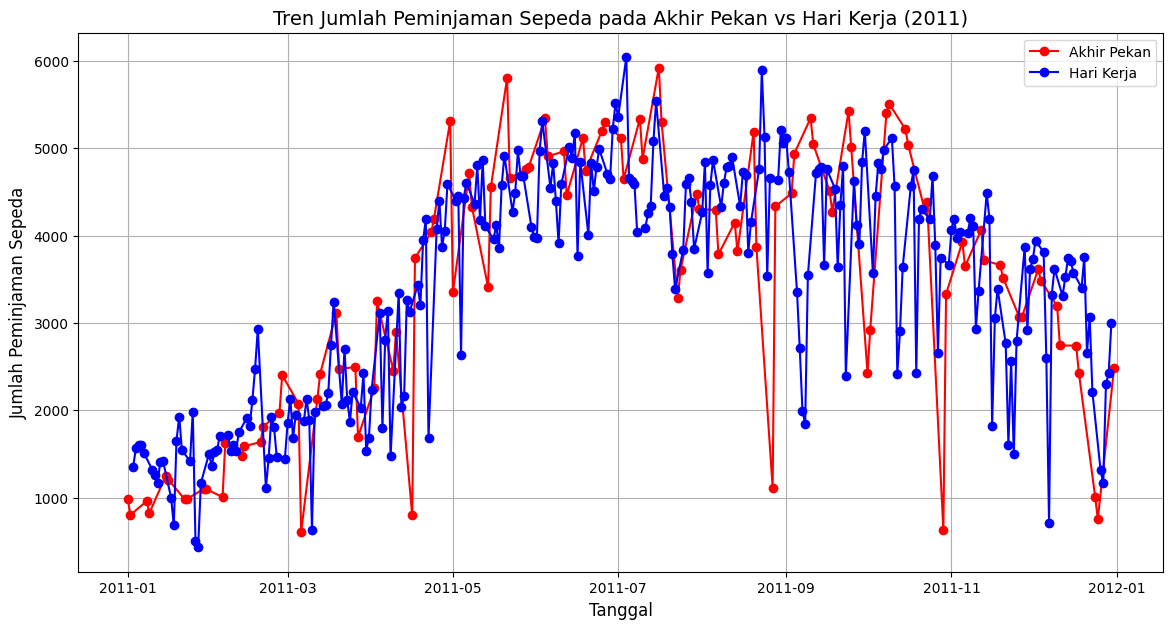

In [557]:
# Asumsi: tidak ada kolom 'holiday', kita bandingkan hari kerja dan akhir pekan
day_df['weekday'] = day_df['dteday'].dt.weekday

# Filter data untuk tahun 2012
data_2011 = day_df[day_df['dteday'].dt.year == 2011]

# Menghitung total peminjaman pada akhir pekan dan hari kerja
peminjaman_akhir_pekan = data_2011[data_2011['weekday'].isin([5, 6])].groupby('dteday')['count'].sum()
peminjaman_hari_kerja = data_2011[~data_2011['weekday'].isin([5, 6])].groupby('dteday')['count'].sum()

# Plot tren jumlah peminjaman sepeda
plt.figure(figsize=(14, 7))
plt.plot(peminjaman_akhir_pekan.index, peminjaman_akhir_pekan.values, label='Akhir Pekan', color='r', marker='o')
plt.plot(peminjaman_hari_kerja.index, peminjaman_hari_kerja.values, label='Hari Kerja', color='b', marker='o')
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Peminjaman Sepeda', fontsize=12)
plt.title('Tren Jumlah Peminjaman Sepeda pada Akhir Pekan vs Hari Kerja (2011)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

**Insight:**
- pertanyaan 1 Grafik tersebut menunjukkan bahwa orang-orang lebih sering menyewa sepeda pada hari kerja dibandingkan dengan akhir pekan.
- pertanyaan 2 Grafik menunjukkan bahwa jumlah orang yang menyewa sepeda biasanya lebih banyak pada hari kerja dibandingkan dengan akhir pekan. Ini menandakan bahwa banyak orang menggunakan sepeda sebagai alat transportasi sehari-hari.

## Analisis Lanjutan (Opsional)

## Analisis Clustering

In [558]:
# Menghitung jumlah nilai unik untuk setiap kolom berdasarkan workingday
workingday_counts = hour_df.groupby(by="workingday", observed=True).nunique()

# Mengurutkan hasil berdasarkan jumlah unik dan menampilkannya
sorted_workingday_counts = workingday_counts.sort_values(by='count', ascending=False)

# Menampilkan hasil
print(sorted_workingday_counts)

            dteday  year  month  hours  holiday  weekend  weather_situation  \
workingday                                                                    
1              500     2     12     24        1        5                  4   
0              231     2     12     24        2        7                  4   

            temp  atemp  humidity  wind_speed  casual  registered  count  \
workingday                                                                 
1             49     64        85          28     172         775    856   
0             49     61        83          28     322         444    676   

            total_users  
workingday               
1                   856  
0                   676  


### insight
Data menunjukkan bahwa orang lebih sering menyewa sepeda pada hari kerja. Ini berarti banyak orang menggunakan sepeda untuk pergi kerja atau sekolah. Faktor seperti cuaca dan kondisi jalan juga bisa mempengaruhi jumlah pengguna sepeda.

## Total Pengguna Berdasarkan weather_situation	

In [559]:
hour_df.groupby(by="weather_situation").agg({"count": ["count"]})

,count
,count
weather_situation,
clear,11413
cloudy,4544
heavy rain,3
light rain,1419


### insight
cuaca sangat mempengaruhi minat orang untuk menggunakan sepeda. Cuaca cerah adalah kondisi ideal untuk bersepeda, sedangkan hujan deras sangat mengurangi minat. Namun, cuaca mendung dan hujan ringan masih memungkinkan orang untuk bersepeda, meskipun dalam jumlah yang lebih sedikit.

##  RFM Analysis

In [560]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('total_users').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'month': 'count',  # Frequency
    'count': 'sum'  # Monetary
}).reset_index()

# Rename nama
rfm_df.columns = ['total_users', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   total_users  Recency  Frequency  Monetary
0            1        0        158       158
1            2        1        208       416
2            3        0        224       672
3            4        3        231       924
4            5        3        260      1300


### insight 
Data ini memberikan gambaran tentang perilaku pelanggan kita. Dengan memahami perilaku pelanggan, kita bisa membuat strategi bisnis yang lebih efektif.

## Conclusion

Berdasarkan hasil analisis, terlihat bahwa penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan. Hal ini menunjukkan bahwa sepeda sering digunakan sebagai  transportasi utama selama hari kerja, kemungkinan besar untuk keperluan aktivitas sehari-hari seperti bekerja atau bersekolah. Tren ini menekankan peran penting sepeda dalam kehidupan sehari-hari masyarakat, khususnya dalam mendukung mobilitas di tengah minggu.